In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library
from PIL import Image # converting images into arrays

## Data Preperation

In [2]:
df_can = pd.read_excel('Dataset\Canada.xlsx',sheet_name='Canada by Citizenship',skiprows=range(20),skipfooter=2)

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.drop(['AREA','REG','DEV','Type','Coverage'],axis=1,inplace=True)
df_can.rename(columns={'OdName':'Country','AreaName':'Continent','RegName':'Region'},inplace=True)
df_can['Total'] = df_can.sum(axis=1)
df_can.set_index('Country',inplace=True)
df_can.columns = list(map(str,df_can.columns))
years = list(map(str,range(1980,2014)))

df_can.shape

(195, 38)

In [5]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [6]:
df_can.to_csv('Canada_cleaned.csv',index = False)

In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

## Word Clouds

In [8]:
!pip install wordcloud
from wordcloud import WordCloud, STOPWORDS

In [9]:
alice_novel = open('Dataset/alice_novel.txt','r').read()

In [10]:
stopwords = set(STOPWORDS)

In [11]:
# instantiate a word cloud object
alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords
)

# generate the word cloud
alice_wc.generate(alice_novel)

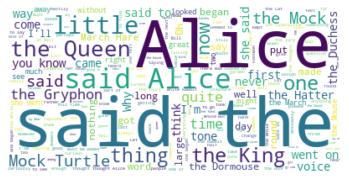

In [12]:
# display the word cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

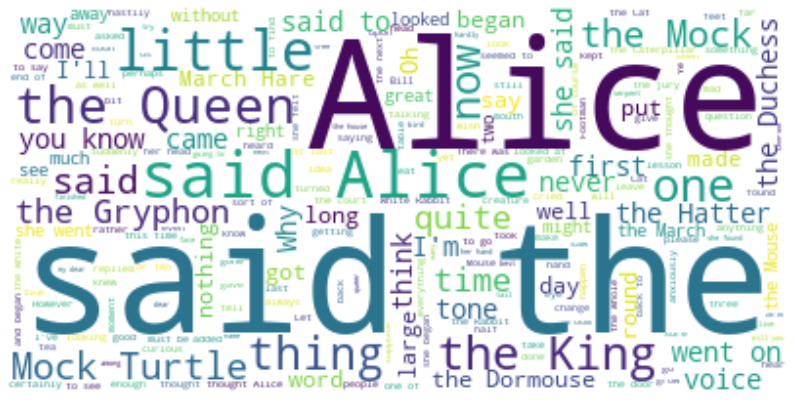

In [13]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

# display the cloud
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

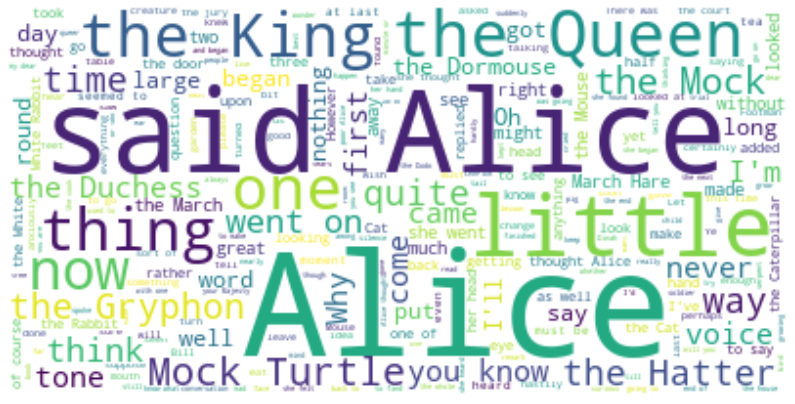

In [14]:
stopwords.add('said') # add the words said to stopwords

# re-generate the word cloud
alice_wc.generate(alice_novel)

# display the cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [15]:
# download image
!wget --quiet https://github.com/ardhiraka/PFDS_sources/raw/master/alice_mask.png -O alice_mask.png

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [16]:
alice_mask = np.array(Image.open('alice_mask.png'))

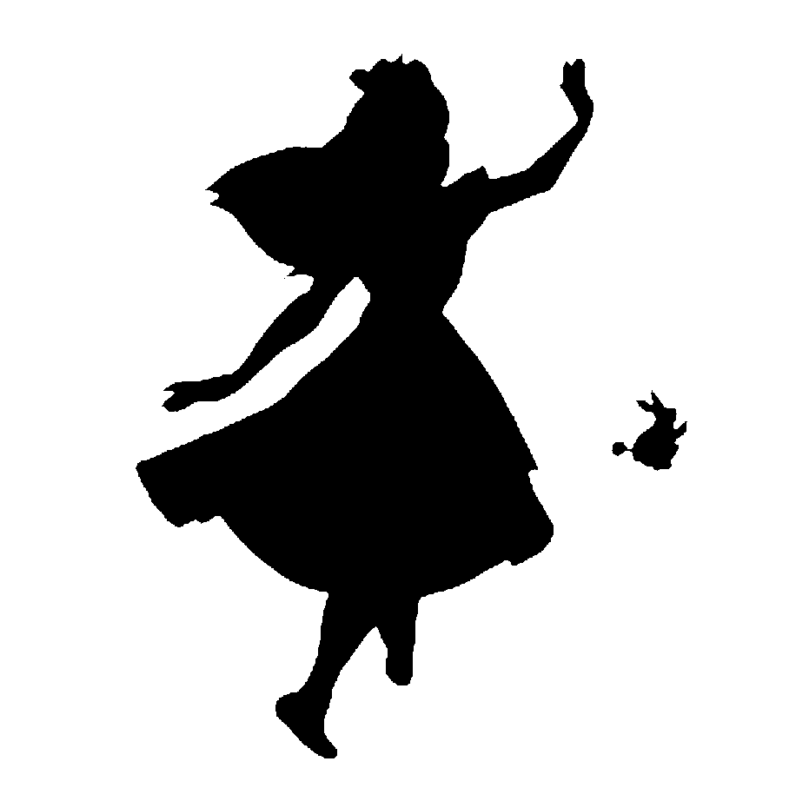

In [17]:
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

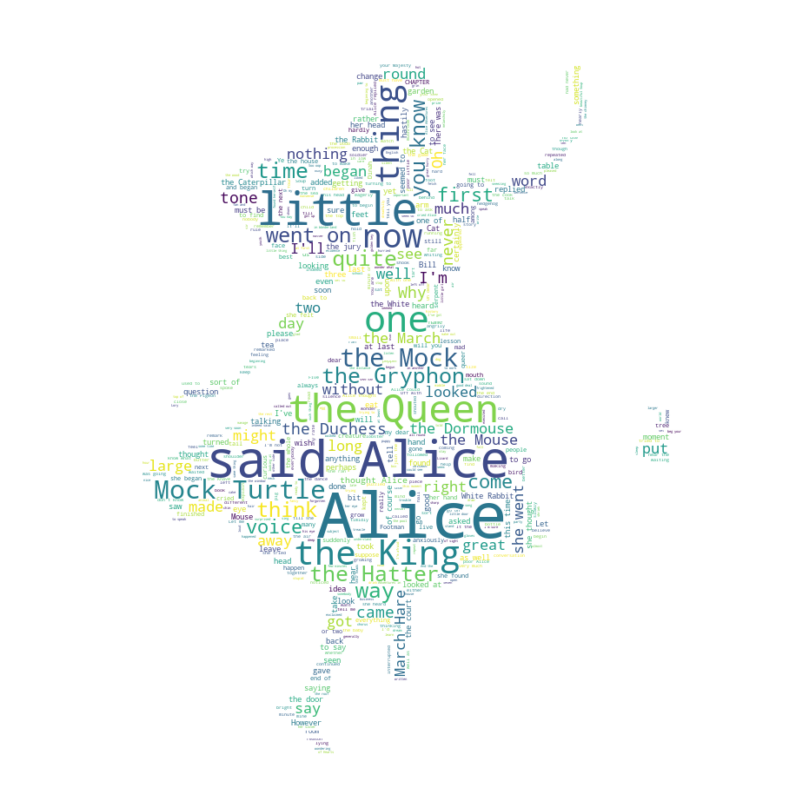

In [18]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

# generate the word cloud
alice_wc.generate(alice_novel)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(14) # set width
fig.set_figheight(18) # set height

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
total_immigration = df_can['Total'].sum()

max_words = 90
word_string = ''
for country in df_can.index.values:
    # check if country's name is a single-word name
    if len(country.split(' ')) == 1:
        repeat_num_times = int(df_can.loc[country, 'Total']/float(total_immigration)*max_words)
        word_string = word_string + ((country + ' ') * repeat_num_times)
                                     
# display the generated text
word_string

'China China China China China China China China China Colombia Egypt France Guyana Haiti India India India India India India India India India Jamaica Lebanon Morocco Pakistan Pakistan Pakistan Philippines Philippines Philippines Philippines Philippines Philippines Philippines Poland Portugal Romania '

In [20]:
# create the word cloud
wordcloud = WordCloud(background_color='white').generate(word_string)

print('Word cloud created!')

Word cloud created!


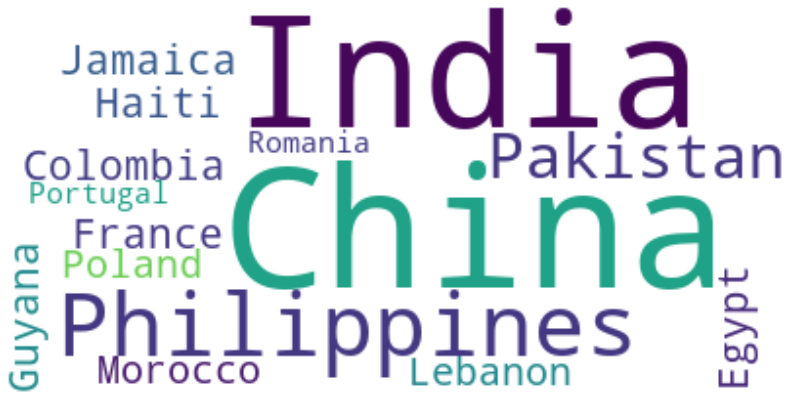

In [21]:
# display the cloud
fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [22]:
import seaborn as sns

## Regression with seaborn

In [23]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float,df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


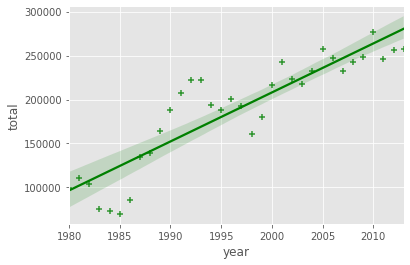

In [24]:
ax = sns.regplot(x='year',y='total',data=df_tot,color='green',marker='+')

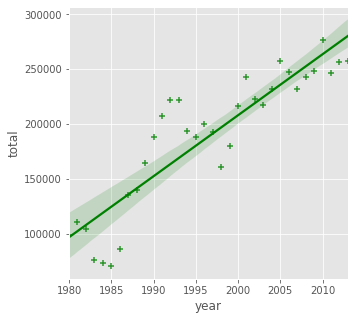

In [25]:
plt.figure(figsize=(5,5))
ax = sns.regplot(x='year',y='total',data=df_tot,color='green',marker='+')

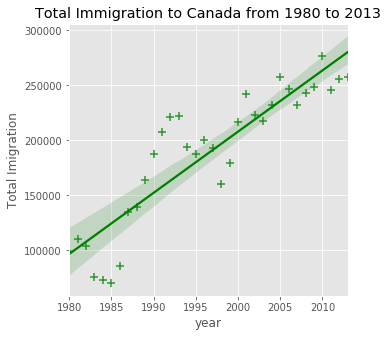

In [26]:
plt.figure(figsize=(5,5))
ax = sns.regplot(x='year',y='total',data=df_tot,color='green',marker='+',scatter_kws={'s':50})

ax.set(xlabel='year',ylabel='Total Imigration')
ax.set_title('Total Immigration to Canada from 1980 to 2013')
plt.show()

## Introduction to Folium

In [27]:
!pip install folium
import folium

In [28]:
# define the world map
world_map = folium.Map()

# display world map
world_map

In [29]:
world_map = folium.Map(location=[-6.992620, 110.428009],zoom_start=15)
world_map

In [30]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Toner')

# display map
world_map

In [31]:
# create a Stamen Toner map of the world centered around Canada
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Terrain')

# display map
world_map

## Maps with Marker

In [32]:
df_incidents = pd.read_csv('Dataset\Police_Department_Incidents_-_Previous_Year__2016_.csv')

In [33]:
df_incidents.head()

,IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,PdId
0,120058272,WEAPON LAWS,POSS OF PROHIBITED WEAPON,Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212120
1,120058272,WEAPON LAWS,"FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE",Friday,01/29/2016 12:00:00 AM,11:00,SOUTHERN,"ARREST, BOOKED",800 Block of BRYANT ST,-122.403405,37.775421,"(37.775420706711, -122.403404791479)",12005827212168
2,141059263,WARRANTS,WARRANT ARREST,Monday,04/25/2016 12:00:00 AM,14:59,BAYVIEW,"ARREST, BOOKED",KEITH ST / SHAFTER AV,-122.388856,37.729981,"(37.7299809672996, -122.388856204292)",14105926363010
3,160013662,NON-CRIMINAL,LOST PROPERTY,Tuesday,01/05/2016 12:00:00 AM,23:50,TENDERLOIN,NONE,JONES ST / OFARRELL ST,-122.412971,37.785788,"(37.7857883766888, -122.412970537591)",16001366271000
4,160002740,NON-CRIMINAL,LOST PROPERTY,Friday,01/01/2016 12:00:00 AM,00:30,MISSION,NONE,16TH ST / MISSION ST,-122.419672,37.765050,"(37.7650501214668, -122.419671780296)",16000274071000


In [34]:
df_incidents.shape

(150500, 13)

In [35]:
# get the first 100 crimes in the df_incidents dataframe
limit = 100
df_incidents = df_incidents.iloc[0:limit, :]

In [36]:
# San Francisco latitude and longitude values
latitude = 37.77
longitude = -122.42

In [37]:
# create map and display it
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# display the map of San Francisco
sanfran_map

In [38]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

In [39]:
# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
sanfran_map.add_child(incidents)

In [40]:
# instantiate a feature group for the incidents in the dataframe
incidents = folium.map.FeatureGroup()

# loop through the 100 crimes and add each to the incidents feature group
for lat, lng, in zip(df_incidents.Y, df_incidents.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5, # define how big you want the circle markers to be
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add pop-up text to each marker on the map
latitudes = list(df_incidents.Y)
longitudes = list(df_incidents.X)
labels = list(df_incidents.Category)

for lat, lng, label in zip(latitudes, longitudes, labels):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)    
    
# add incidents to map
sanfran_map.add_child(incidents)

In [41]:
from folium import plugins

# let's start again with a clean copy of the map of San Francisco
sanfran_map = folium.Map(location = [latitude, longitude], zoom_start = 12)

# instantiate a mark cluster object for the incidents in the dataframe
incidents = plugins.MarkerCluster().add_to(sanfran_map)

# loop through the dataframe and add each data point to the mark cluster
for lat, lng, label, in zip(df_incidents.Y, df_incidents.X, df_incidents.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

# display map
sanfran_map

In [42]:
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [43]:
df_can.shape

(195, 38)

In [48]:
df_can.reset_index(inplace=True)

In [49]:
world_geo= r'Dataset/world_countries.json'
# create a plain world map

world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')

# generate choropleth map using the total immigration of each country to Canada from 1980 to 2013
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)

# display map
world_map